<a href="https://colab.research.google.com/github/NaveenS-07/AIML/blob/main/FinBERT_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ STEP 1: Install Required Libraries
!pip install transformers --quiet
!pip install torch --quiet

# ✅ STEP 2: Import Libraries
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

# ✅ STEP 3: Load Your Cleaned Dataset
df = pd.read_csv('/content/CMTS_cleaned.csv')
comments = df['Comment'].tolist()

# ✅ STEP 4: Load FinBERT Tokenizer and Model (from Hugging Face)
model_name = "yiyanghkust/finbert-tone"  # FinBERT trained on financial tone
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# ✅ STEP 5: Define Sentiment Prediction Function
def get_sentiment(comment):
    inputs = tokenizer(comment, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=1)
    confidence, predicted_class = torch.max(probs, dim=1)
    label = ['positive', 'negative', 'neutral'][predicted_class.item()]
    return label, confidence.item()

# ✅ STEP 6: Apply Sentiment Analysis on All Comments
sentiments = []
confidences = []

for comment in comments:
    label, conf = get_sentiment(comment)
    sentiments.append(label)
    confidences.append(conf)

# ✅ STEP 7: Save the Results to CSV
df['Sentiment'] = sentiments
df['Confidence'] = confidences

# Preview
df.head()

# ✅ STEP 8: Export the results
df.to_csv('/content/CMTS_with_sentiment.csv', index=False)
print("✅ Sentiment analysis completed and saved as 'CMTS_with_sentiment.csv'")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


✅ Sentiment analysis completed and saved as 'CMTS_with_sentiment.csv'


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply to all comments for cleaned visualization
df['Cleaned_Comment'] = df['Comment'].apply(remove_stopwords)


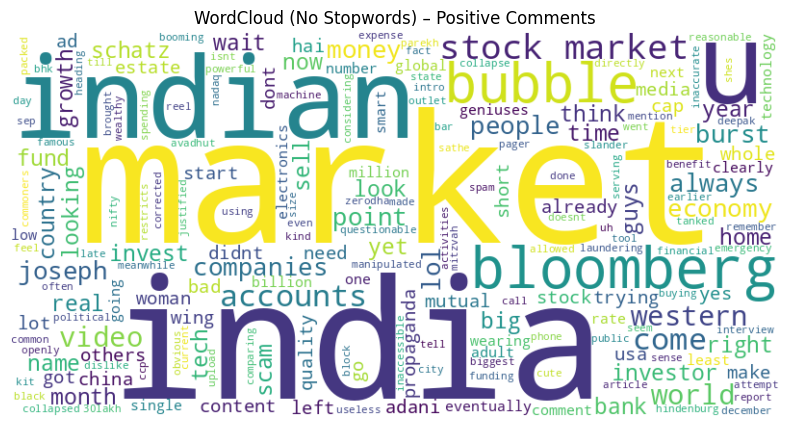

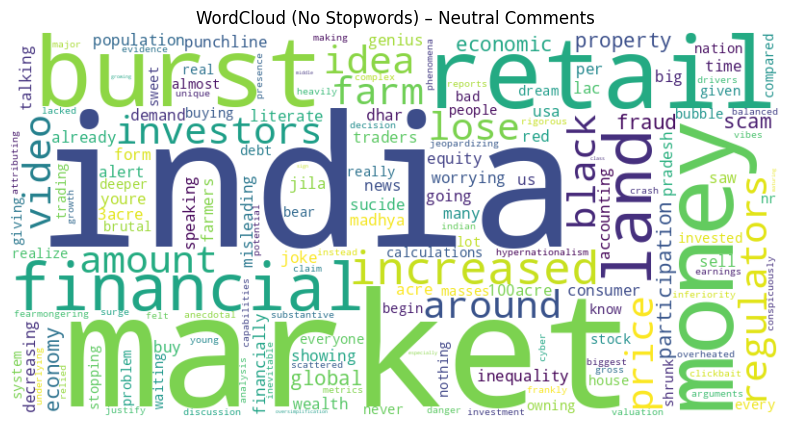

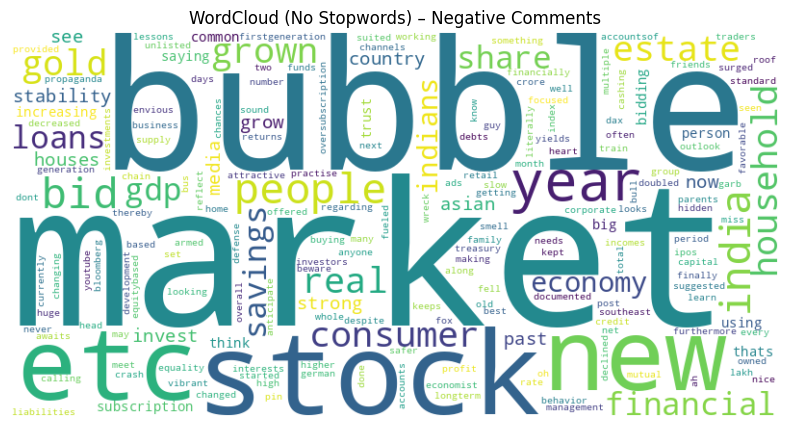

In [ ]:
# Plot wordcloud with cleaned text
def plot_cleaned_wordcloud(sentiment_label):
    text = " ".join(df[df['Sentiment'] == sentiment_label]['Cleaned_Comment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud (No Stopwords) – {sentiment_label.capitalize()} Comments")
    plt.show()

# Run for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    plot_cleaned_wordcloud(sentiment)


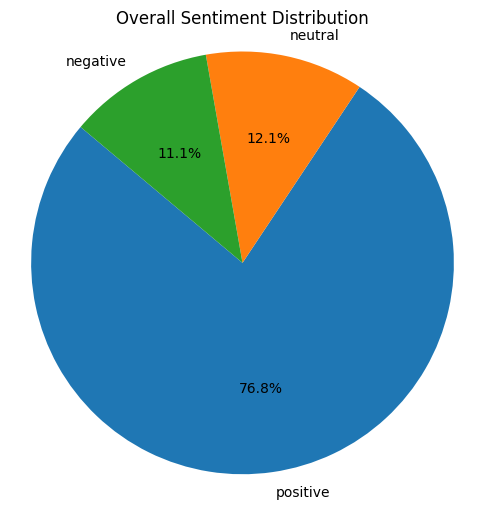

In [ ]:
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = df['Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Sentiment Distribution')
plt.axis('equal')
plt.show()


<ipython-input-31-a69650b6a2d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['positive', 'neutral', 'negative'], palette='coolwarm')


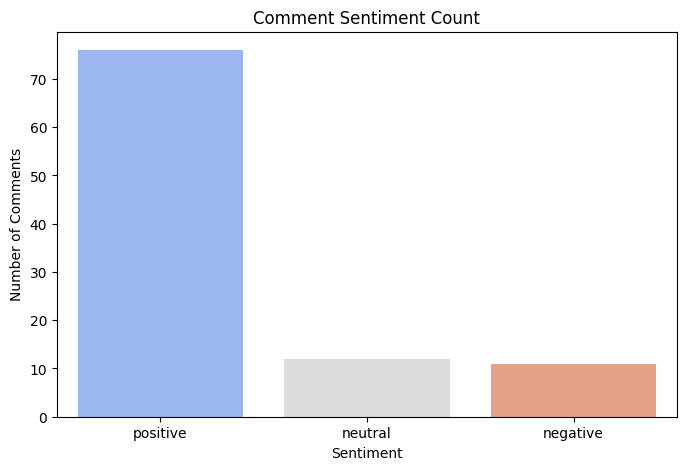

In [ ]:
import seaborn as sns

# Bar chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', order=['positive', 'neutral', 'negative'], palette='coolwarm')
plt.title("Comment Sentiment Count")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


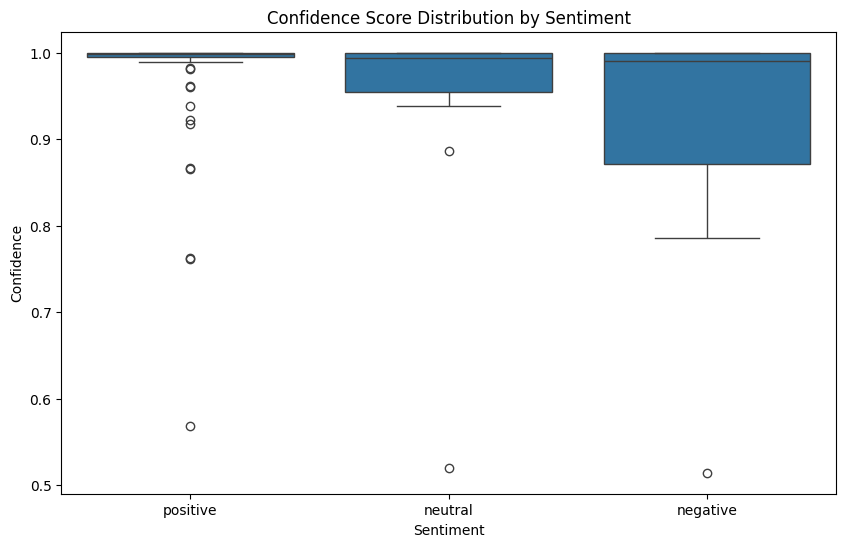

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='Confidence', order=['positive', 'neutral', 'negative'])
plt.title("Confidence Score Distribution by Sentiment")
plt.show()


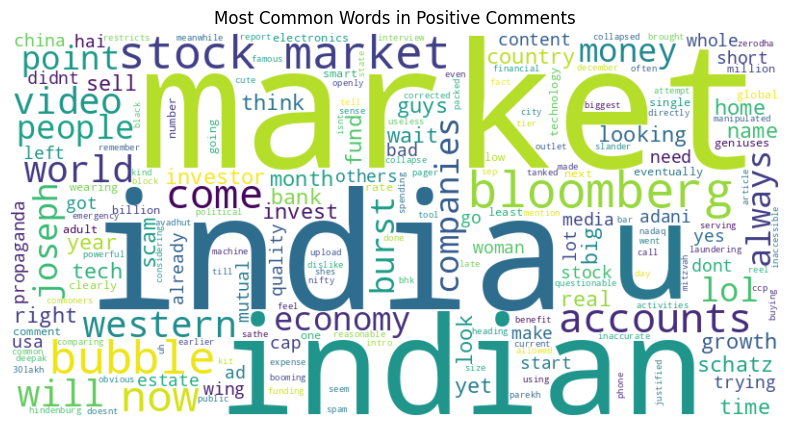

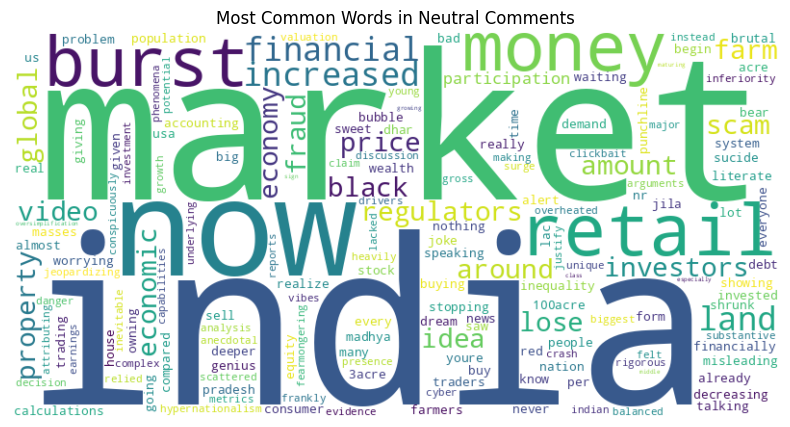

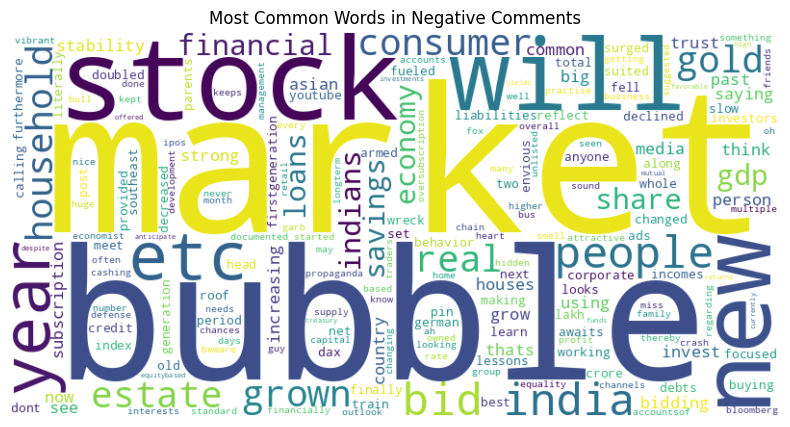

In [ ]:
from wordcloud import WordCloud

# Function to plot word cloud
def plot_wordcloud(sentiment_label):
    text = " ".join(df[df['Sentiment'] == sentiment_label]['Comment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {sentiment_label.capitalize()} Comments')
    plt.show()

# WordCloud for all sentiments
for sentiment in ['positive', 'neutral', 'negative']:
    plot_wordcloud(sentiment)


In [ ]:
# Example: Remove comments with < 5 words for deeper analysis
df_filtered = df[df['Cleaned_Comment'].str.split().apply(len) >= 5]


In [ ]:
df_filtered = df[df['Cleaned_Comment'].str.split().apply(len) >= 5]


In [ ]:
# Filter comments that have 5 or more words
df_filtered = df[df['Cleaned_Comment'].str.split().apply(len) >= 5]


In [ ]:
# Show top 5 rows to confirm it worked
df_filtered.head()


,Unnamed: 0,Comment,Sentiment,Confidence,Cleaned_Comment
0,1,lol whole world is trying to short indian stoc...,positive,0.998481,lol whole world trying short indian stock mark...
1,2,"the stock market is often manipulated, serving...",positive,0.762562,"stock market often manipulated, serving tool m..."
2,3,regulators worrying about the population in in...,neutral,0.996238,regulators worrying population india genius jo...
3,4,the inequality of wealth in india is now showi...,neutral,0.999996,inequality wealth india showing form decreasin...
4,5,1 bad month and people call it collapse.,positive,0.989200,1 bad month people call collapse.


In [ ]:
# Top 3 Positive (Filtered)
top_pos = df_filtered[df_filtered['Sentiment'] == 'positive'].sort_values(by='Confidence', ascending=False).head(3)
print("🔷 Top Positive Comments (Filtered):")
display(top_pos[['Comment', 'Confidence']])

# Top 3 Negative (Filtered)
top_neg = df_filtered[df_filtered['Sentiment'] == 'negative'].sort_values(by='Confidence', ascending=False).head(3)
print("\n🔴 Top Negative Comments (Filtered):")
display(top_neg[['Comment', 'Confidence']])


🔷 Top Positive Comments (Filtered):


,Comment,Confidence
10,india directly got phone but not when others w...,0.999994
82,when you have like 67 indices and all of the h...,0.999991
37,in all of india they only found joseph as the ...,0.999979



🔴 Top Negative Comments (Filtered):


,Comment,Confidence
67,"india needs it, strong supply chain management...",1.000000
90,"overall, 51 of traders anticipate that this ye...",1.000000
59,"beware media houses like the economist, bloomb...",0.999996
